
Kunchapu Gowri Sai-99220040595 - Github- [Link Text](https://github.com/KunchapuGowriSai/single-layer-neural-network-DL-2)


Initial Weights (Hidden Layer): [[-0.02560935  0.5163109   1.05987212 -2.264149    0.21073424  0.15843236
  -0.19379553  0.51216112 -0.83369433  0.38937674]
 [-0.47140681 -0.29301598  0.61969475 -0.92908512 -0.1789355  -0.69676052
  -0.52735037 -1.34823745 -1.19898398 -1.09196398]
 [ 0.33718241 -1.43117092  0.20777535 -0.34037899 -0.68356979 -2.00315485
  -0.24511821  0.02084958 -1.36629338 -1.58214563]
 [ 0.48879644 -1.19436715  1.67772053  0.69010895 -0.95789298  0.34681703
  -0.9723626  -0.50354788  0.65374578  0.63331669]
 [-1.02989347  0.36426371  0.69543235  0.00352895  0.7663426  -0.9499487
  -0.16387684  0.80195376 -0.39460657 -0.34685986]]
Initial Weights (Output Layer): [ 1.58642666e-01 -6.20277442e-01 -1.25704704e+00  5.65244610e-01
 -1.67265870e-04 -1.51893057e+00  1.01238706e+00 -1.01512249e+00
  2.31783396e+00  5.43973248e-02]
Epoch:     0 ; Validation loss:  0.5186 ; Validation accuracy:   0.445
Epoch:   100 ; Validation loss:  0.2439 ; Validation accuracy:   0.555
Epoch

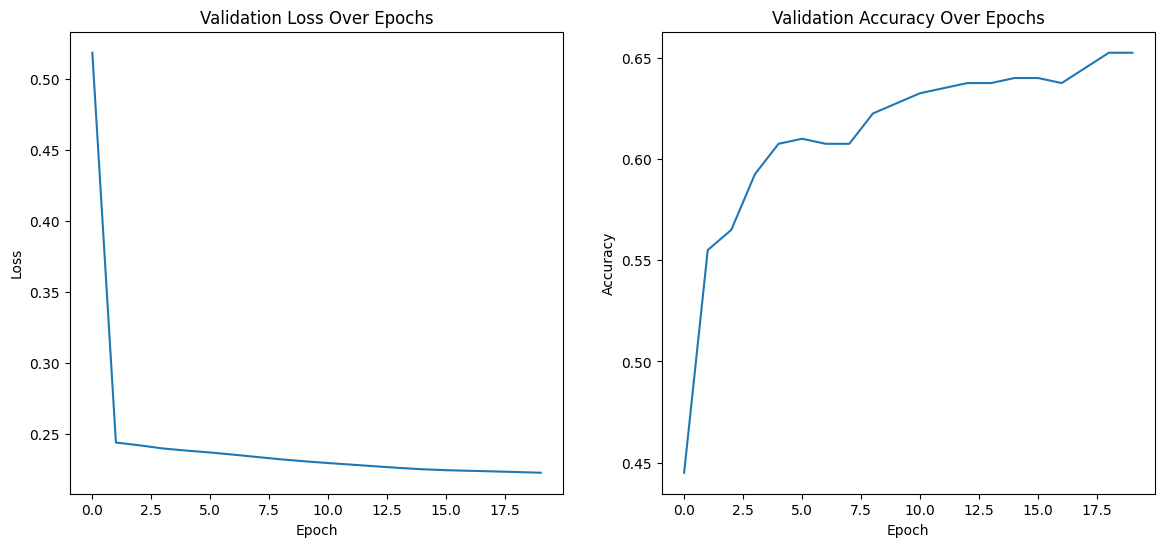

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the Wine Quality dataset
data = pd.read_csv('/content/winequality-red.csv')
data.head(5)

# Selecting features and labels
# We will use some of the features from the dataset for our model
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides']].values
y = (data['quality'] >= 6).astype(int).values  # Convert quality to binary (1 if quality >= 6, else 0)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# Define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initialize the neural network parameters
n_hidden = 10
n_epochs = 2000
learning_rate = 0.68

weights_hidden = np.random.normal(0.0, size=(X_train.shape[1], n_hidden))
weights_output = np.random.normal(0.0, size=(n_hidden))

hist_loss = []
hist_accuracy = []

print("Initial Weights (Hidden Layer):", weights_hidden)
print("Initial Weights (Output Layer):", weights_output)

# Training the neural network
for e in range(n_epochs):
    del_w_hidden = np.zeros(weights_hidden.shape)
    del_w_output = np.zeros(weights_output.shape)

    for x_, y_ in zip(X_train, y_train):
        hidden_input = np.dot(x_, weights_hidden)
        hidden_output = sigmoid(hidden_input)
        output = sigmoid(np.dot(hidden_output, weights_output))

        # Calculate errors
        error = y_ - output
        output_error = error * output * (1 - output)
        hidden_error = np.dot(output_error, weights_output) * hidden_output * (1 - hidden_output)

        # Update weights
        del_w_output += output_error * hidden_output
        del_w_hidden += hidden_error * x_[:, None]

    # Apply weight updates
    weights_hidden += learning_rate * del_w_hidden / X_train.shape[0]
    weights_output += learning_rate * del_w_output / X_train.shape[0]

    # Logging the loss and accuracy
    if e % 100 == 0:
        hidden_output_val = sigmoid(np.dot(X_val, weights_hidden))
        out_val = sigmoid(np.dot(hidden_output_val, weights_output))
        loss = np.mean((out_val - y_val) ** 2)
        predictions = out_val > 0.5
        accuracy = np.mean(predictions == y_val)
        hist_loss.append(loss)
        hist_accuracy.append(accuracy)
        print("Epoch: ", '{:>4}'.format(e),
              "; Validation loss: ", '{:>6}'.format(loss.round(4)),
              "; Validation accuracy: ", '{:>6}'.format(accuracy.round(4)))

# Plotting loss and accuracy over epochs
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(hist_loss)
plt.title("Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(hist_accuracy)
plt.title("Validation Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.show()
